<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Выбор-локации-для-скважины" data-toc-modified-id="Выбор-локации-для-скважины-1">Выбор локации для скважины</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2">Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3">Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4">Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5">Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">Общий вывод</a></span></li></ul></div>

# Выбор локации для нефтяной скважины

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 
Шаги для выбора локации:

Как правило для выбора локации используют следующие шаги:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
state = np.random.RandomState(12345)
pd.options.mode.chained_assignment = None

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')    
try:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')    

In [3]:
display(data_0.head())
display(data_1.head())
display(data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Выведем основную информацию о датафреймах

In [4]:
print('Датафрейм 0')
display(data_0.info())
display(data_0.describe())
print('Датафрейм 1')
display(data_1.info())
display(data_1.describe())
print('Датафрейм 2')
display(data_2.info())
display(data_2.describe())

Датафрейм 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Датафрейм 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Датафрейм 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Рассмотрим количество явных дубликатов в датафреймах.

In [5]:
print('Количество явных дубликатов в датафрейм 0:' ,data_0.duplicated().sum())

print('Количество явных дубликатов в датафрейм 1:' ,data_1.duplicated().sum())

print('Количество явных дубликатов в датафрейм 2:' ,data_2.duplicated().sum())

Количество явных дубликатов в датафрейм 0: 0
Количество явных дубликатов в датафрейм 1: 0
Количество явных дубликатов в датафрейм 2: 0


Рассмотрим количество пропусков в датафреймах.

In [6]:
data_0.isna().mean()
data_1.isna().mean()
data_2.isna().mean()

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

Удалим неинформативные признаки

In [7]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

**При подготовке данных были выполнены следующие действия:**
- Ознакомились с датафреймом
- Проверили данные на дубликаты
- Проверили данные на наличие пропусков
- Были удалены неинформативные признаки(столбец 'id')

# Обучение и проверка модели

Разделим данные на признаки и целевой признак.

In [8]:
features_0 = data_0.drop('product', axis = 1)
target_0 = data_0['product']
features_1 = data_1.drop('product', axis = 1)
target_1 = data_1['product']
features_2 = data_2.drop('product', axis = 1)
target_2 = data_2['product']

Разделим данные на обучающую и валидационную выборки.

In [9]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.3,
                                                                              random_state=state)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.3,
                                                                              random_state=state)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.3,
                                                                              random_state=state)

Напишем функцию, которая принимает данные обучающей и валидационной выборок, которая выводит RMSE модели и возвращает предсказания модели по региону.

In [10]:
def lin_regression(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse =mse**0.5
    return predicted_valid, mse, rmse

In [11]:
predicted_valid_0, mse_0, rmse_0 = lin_regression(features_train_0, target_train_0, features_valid_0, target_valid_0)
print('Регион 0:')
print('Средний запас нефти: {:.1f} тыс. баррелей'.format(predicted_valid_0.mean()))
print('MSE: {:.1f}'.format(mse_0))
print('RMSE: {:.1f}'.format(rmse_0))
print()


Регион 0:
Средний запас нефти: 92.6 тыс. баррелей
MSE: 1415.1
RMSE: 37.6



In [12]:
predicted_valid_1, mse_1, rmse_1 = lin_regression(features_train_1, target_train_1, features_valid_1, target_valid_1)
print('Регион 1:')
print('Средний запас нефти: {:.2f} тыс. баррелей'.format(predicted_valid_1.mean()))
print('MSE: {:.1f}'.format(mse_1))
print('RMSE: {:.1f}'.format(rmse_1))
print()


Регион 1:
Средний запас нефти: 68.96 тыс. баррелей
MSE: 0.8
RMSE: 0.9



In [13]:
predicted_valid_2, mse_2, rmse_2 = lin_regression(features_train_2, target_train_2, features_valid_2, target_valid_2)
print('Регион 2:')
print('Средний запас нефти: {:.1f} тыс. баррелей'.format(predicted_valid_2.mean()))
print('MSE: {:.1f}'.format(mse_2))
print('RMSE: {:.1f}'.format(rmse_2))
print()

Регион 2:
Средний запас нефти: 95.0 тыс. баррелей
MSE: 1588.2
RMSE: 39.9



**В ходе обучения и проверки модели были выполнены следующие действия:**
- Разделили данные на признаки и целевой признак.
- Разделили данные на обучающую и валидационную выборки.
- Предсказали среднее количество запасов нефти для регионов
- Рассчитали MSE и RMSE для разных регионов

# Подготовка к расчёту прибыли

*Условия задачи:*
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью

Запишем необходимые значения из условия задачи в переменные для дальнейших расчётов. 

In [14]:
budget = 1e+10 
holes = 500 
best_holes = 200 
barrel_price = 450e+3 

required_volume = budget / best_holes / barrel_price

print('Средний объем нефти на скважину: {:.2f} тыс. баррелей'.format(required_volume))

Средний объем нефти на скважину: 111.11 тыс. баррелей


**Создадим функциию для расчёта прибыли по выбранным скважинам и предсказаниям модели**

In [15]:
predicted_valid_0 = pd.Series(predicted_valid_0)
predicted_valid_1 = pd.Series(predicted_valid_1)
predicted_valid_2 = pd.Series(predicted_valid_2)

In [16]:
target_valid_0 = target_valid_0.reset_index(drop = True)
target_valid_1 = target_valid_1.reset_index(drop = True)
target_valid_2 = target_valid_2.reset_index(drop = True)

In [17]:
def function_profit(predicted_valid, target_valid, barrel_price, best_holes, budget):
    p1=predicted_valid.sort_values(ascending = False)
    t1=target_valid[p1.index][:best_holes]
    return t1.sum() * barrel_price - budget 

In [18]:
print('{:,.2f}'.format(function_profit(predicted_valid_0, target_valid_0, barrel_price, best_holes, budget)).replace(',', ' '))
print('{:,.2f}'.format(function_profit(predicted_valid_1, target_valid_1, barrel_price, best_holes, budget)).replace(',', ' '))
print('{:,.2f}'.format(function_profit(predicted_valid_2, target_valid_2, barrel_price, best_holes, budget)).replace(',', ' '))

3 360 315 346.49
2 415 086 696.68
2 509 038 871.84


**В ходе подготовки расчётов к прибыли.**
- Были записаны необходимые значения из условия задачи в переменные для дальнейших расчётов
- Рассчитали прибыль для регионов по выбранным точкам.

# Расчёт прибыли и рисков

Средняя прибыль региона 0 : 409 445 393.77 руб.
2.5%-квантиль: 408 308 601.05 руб.
95%-ый доверительный интервал: (-169664169.031382, 987668511.464184)
Количество отрицательных значений прибыли на 1000 выборок: 80
Вероятность убытков 8.00%


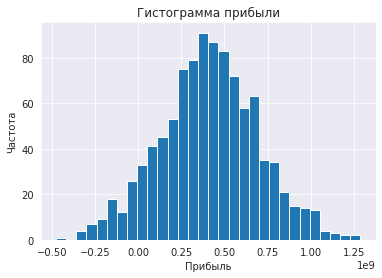

Средняя прибыль региона 1 : 518 364 176.02 руб.
2.5%-квантиль: 523 372 071.18 руб.
95%-ый доверительный интервал: (100301246.0652204, 928663073.9947308)
Количество отрицательных значений прибыли на 1000 выборок: 4
Вероятность убытков 0.40%


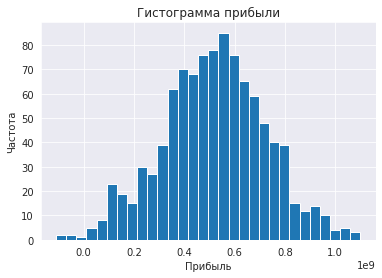

Средняя прибыль региона 2 : 373 016 216.57 руб.
2.5%-квантиль: 383 985 696.86 руб.
95%-ый доверительный интервал: (-163976119.72298354, 887263814.3927201)
Количество отрицательных значений прибыли на 1000 выборок: 95
Вероятность убытков 9.50%


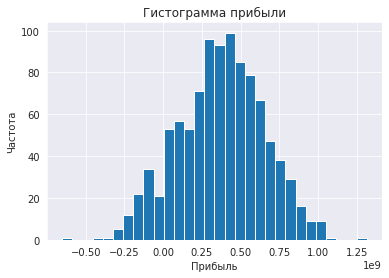

In [19]:
boot_target = [target_valid_0, target_valid_1, target_valid_2]
boot_predict = [predicted_valid_0, predicted_valid_1, predicted_valid_2]

values = []

for region in range(3): 
    for i in range(1000): 
        target_subsample = boot_target[region].sample(n=500, replace=True, random_state=state)  
        probs_subsample = boot_predict[region][target_subsample.index]
        values.append(function_profit(probs_subsample, target_subsample, barrel_price, best_holes, budget)) 

    values = pd.Series(values)
    lower = values.quantile(0.5)
    confidence_interval = (values.quantile(0.025), values.quantile(0.975)) 
    
    mean = values.mean()
    
    negativ_count = values[values < 0].count() 
   
    print("Средняя прибыль региона", region, ": {:,.2f}".format(mean).replace(',', ' '), "руб.")
    print("2.5%-квантиль: {:,.2f}".format(lower).replace(',', ' '), "руб.")
    print("95%-ый доверительный интервал:", confidence_interval)
    print("Количество отрицательных значений прибыли на 1000 выборок:", negativ_count)
    print("Вероятность убытков {:.2%}".format(negativ_count / len(values)))
    
    
    sns.set_style('darkgrid')
    values.plot(kind = 'hist', bins = 30)
    plt.title('Гистограмма прибыли')
    plt.xlabel('Прибыль')
    plt.ylabel('Частота')
    plt.show()
    
    values = []

**Воспользовавшись техникой Bootstrap.**
- Выяснили доверительные интервал 95% для регионов
- Вычислили предполагаемую средняю прибыль для регионов
- Определили предполагаемые риски для регионов
- Количество отрицательных значений прибыли на 1000 выборок
- 2.5%-квантиль

# Общий вывод

**1 Загрузка и подготовка данных**
- Ознакомились с датафреймом
- Проверили данные на дубликаты
- Проверили данные на наличие пропусков
- Были удалены неинформативные признаки(столбец 'id')

**2 Обучение и проверка модели**
- Разделили данные на признаки и целевой признак.
- Разделили данные на обучающую и валидационную выборки.
- Предсказали среднее количество запасов нефти для регионов
- Рассчитали MSE и RMSE для разных регионов

**3 Подготовка к расчёту прибыли**
- Были записаны необходимые значения из условия задачи в переменные для дальнейших расчётов
- Рассчитали прибыль для регионов по выбранным точкам.

**4 Расчёт прибыли и рисков**
- Выяснили доверительные интервал 95% для регионов
- Вычислили предполагаемую средняю прибыль для регионов
- Определили предполагаемые риски для регионов
- Количество отрицательных значений прибыли на 1000 выборок
- 2.5%-квантиль

**По итогу исследования можем сделать вывод, что наиболее подходящим для бизнеса является регион 1.**